# Exercise 7: Decision Trees

Exercise 7: train and fine-tune a Decision Tree for the moons dataset.

a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).

   Adding random_state=42 to make this notebook's output constant (which you will note is the textbook author's 
   preferred value.  
   
First, we're going to setup a lot of things for all the following exercises.  

In [108]:
# allow inline plotting instead of popping out
%matplotlib inline

import os
import sklearn
import numpy as mp
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, load_wine

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

#Use a little pandas to see what is in the dataset
m = pd.DataFrame(X_moons)
m.head()

,0,1
0,0.940291,0.122306
1,0.124540,-0.424775
2,0.261988,0.508414
3,-0.495238,0.072589
4,-0.879413,0.549373


b. Split it into a training set and a test set using train_test_split().

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)

c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [111]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

By default, GridSearchCV trains the best model found on the whole training set (you can change this by setting refit=False), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [112]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

# An additional decision tree exercise

It is pretty hard to see what is going on with splits etc. using the make_moons data.  Let's revision this using the wine dataset which we can also get from the UC Irvine machine learning repository.  We'll setup packages specific to this section below.  

In [113]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree, DecisionTreeRegressor

In [114]:
#Setup the data

dataset = datasets.load_wine()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
print(model)

expected_y = y_test
predicted_y = model.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y, target_names=dataset.target_names))
print(metrics.confusion_matrix(expected_y, predicted_y))


DecisionTreeClassifier()
              precision    recall  f1-score   support

     class_0       0.73      1.00      0.85        11
     class_1       1.00      0.71      0.83        17
     class_2       0.94      1.00      0.97        17

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.88        45
weighted avg       0.91      0.89      0.89        45

[[11  0  0]
 [ 4 12  1]
 [ 0  0 17]]


This tells us a lot.  And, we can see some misclassifications from the confusion matrix.  However, we still cannot "see" what this looks like.  Now let's see what this looks like.  

[Text(0.5, 0.8333333333333334, 'proline <= 755.0\ngini = 0.651\nsamples = 133\nvalue = [48, 54, 31]\nclass = class_1'),
 Text(0.25, 0.5, 'flavanoids <= 0.975\ngini = 0.469\nsamples = 78\nvalue = [2, 51, 25]\nclass = class_1'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21]\nclass = class_2'),
 Text(0.375, 0.16666666666666666, 'gini = 0.193\nsamples = 57\nvalue = [2, 51, 4]\nclass = class_1'),
 Text(0.75, 0.5, 'od280/od315_of_diluted_wines <= 2.49\ngini = 0.286\nsamples = 55\nvalue = [46, 3, 6]\nclass = class_0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.245\nsamples = 7\nvalue = [0, 1, 6]\nclass = class_2'),
 Text(0.875, 0.16666666666666666, 'gini = 0.08\nsamples = 48\nvalue = [46, 2, 0]\nclass = class_0')]

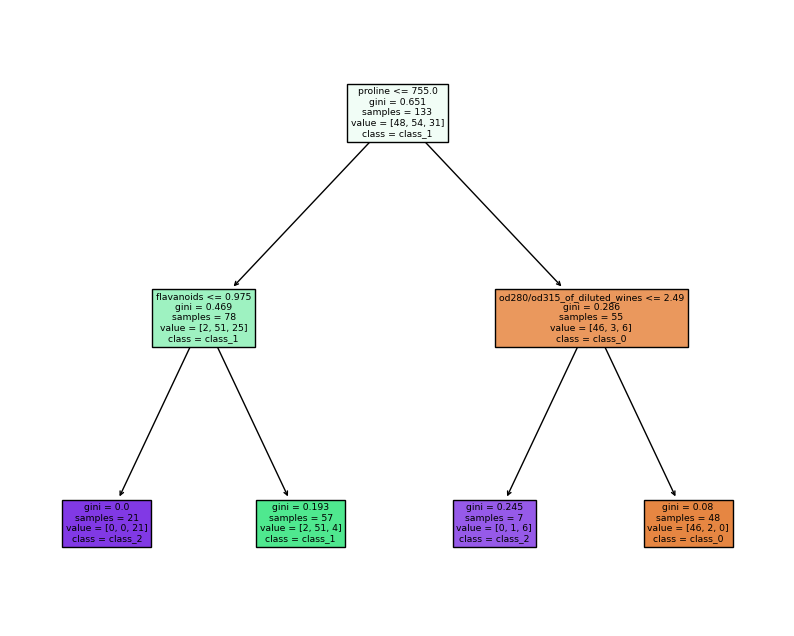

In [115]:
# create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

# plot classifier tree
plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=dataset.feature_names, class_names=dataset.target_names, filled=True)

What does this look like using another method to get the data in .csv format from UC Irvine then doing the analysis.  We'll be using a plt.figure command after loading and analyzing the data a second way

In [116]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine//wine.data', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

display(df.head())

X = df.drop('Class label', 1)
y = df['Class label']
#X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Training data points: 124
#Testing data points: 54
Class labels: [1 2 3]


C:\Users\McDaniel\AppData\Local\Temp\ipykernel_10284\1644318903.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Class label', 1)


Now we need to train our decision tree.  

In [117]:
# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Note that you do not have to scale attributes before training a decision tree...  Can you think of why that is true?

In [118]:
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

# a more convenient way to evaluate a trained model is to use the sklearn.metrics 
from sklearn.metrics import accuracy_score
print('Accuracy (tree, sklearn): %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
Accuracy (tree): 0.96
Accuracy (tree, sklearn): 0.96


This method yields an accuracy that is virtually the same as that from the first time.  

In [119]:
if not os.path.exists("./output/") : os.mkdir("./output/")
export_graphviz(
    tree,
    out_file='./output/tree.dot', 
    feature_names=X.columns.values
)

I had to search around to find out where the output from Jupyter notebooks was going on my computer.  It was simple in the end... the output was gpomg to my user directory in the "output" directory or folder.  Using a command prompt in that directory and the command dot -Tpng tree.dot -o fig-tree.png" I was able to create the decision tree that I've included in your instructions.

Note that from the root this tree is different than the first tree (inline in this notebook).  This is true even though we are using the same dataset, or at least we've been led to believe that is true.  Why does this happen?  Well, because different coders have set the parameter "random state" to different values and run their codes using different packages.  I have argued that if we are using exactly the same data and exactly the same method we will get the same answer(s).  In this case we are not really running exactly the same methods.  Using best practices for reproducible research is important!  

# Exercise 8

At the beginning of Chapter 6 Géron argues that random forests are among the most powerful machine learning algorithms available today.  So, let's continue with the next exercise to see what he means.  Before we can start we have to redo the first couple cells from above our work on the wine dataset so the code doesn't get confused.  

Exercise: Grow a forest.

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ShuffleSplit class for this.

In [120]:
# allow inline plotting instead of popping out
%matplotlib inline

import os
import sklearn
import numpy as mp
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, load_wine

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

#Use a little pandas to see what is in the dataset
m = pd.DataFrame(X_moons)
m.head()

,0,1
0,0.940291,0.122306
1,0.124540,-0.424775
2,0.261988,0.508414
3,-0.495238,0.072589
4,-0.879413,0.549373


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)

In [122]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [123]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.805671

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's mode() function for this). This gives you majority-vote predictions over the test set.

In [124]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [125]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

C:\Users\McDaniel\AppData\Local\Temp\ipykernel_10284\2539803968.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)


d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [126]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873

This answer is about 1.1% higher than the original accuracy score or well within the parameters for improvement Géron gives in the textbook.  